In [2]:
import pandas as pd
import numpy as np
from custom_scaler import  column_transformer, tree_column_transformer


from PAIFS import PrecisionAwareFeatureSelector

In [3]:
X = pd.read_table('x_train.txt', sep=" ", header=None)
X.columns = [str(i) for i in range(X.shape[1])]
y = pd.read_table('y_train.txt', header=None).to_numpy(dtype=np.int8).squeeze()

# Precision Aware Feature Selector

## All Features

### Standard column scaler

In [3]:
selector = PrecisionAwareFeatureSelector(
        max_features=10,
        cv_folds=5,
        n_iterations=15,
        stability_threshold=0.7,
        early_stopping_patience=3,
        top_percentile=20,
        scaler="ct",
        column_transformer=column_transformer,
        random_state=42
    )

In [4]:
selector.fit(X,y)

Starting PAIFS with 500 features, targeting 10 features
Optimizing precision at top 20% of predictions
Excluded 0 features. Remaining: 500 features

Phase 1: Initial importance-based filtering...
Selected top 50 features based on ensemble importance

Phase 2: Iterative precision-aware selection...
Iteration 1: Added feature 3, Score: 0.7470, Total features: 1
Iteration 2: Added feature 2, Score: 0.7580, Total features: 2
Iteration 3: Added feature 4, Score: 0.7710, Total features: 3
Iteration 4: Added feature 395, Score: 0.7750, Total features: 4
Iteration 5: Added feature 365, Score: 0.7740, Total features: 5
Iteration 6: Added feature 6, Score: 0.7720, Total features: 6
Feature selection stabilized at iteration 6

Final selection: 6 features
Selected features (original indices): [3, 2, 4, 395, 365, 6]
Final precision@top20%: 0.7750


### Alt Scaler

In [2]:
selector = PrecisionAwareFeatureSelector(
        max_features=10,
        cv_folds=5,
        n_iterations=15,
        stability_threshold=0.7,
        early_stopping_patience=3,
        top_percentile=20,
        scaler="act",
        column_transformer=column_transformer,
        alternative_column_transformer=tree_column_transformer,
        random_state=42
    )

In [5]:
selector.fit(X,y)

Starting PAIFS with 500 features, targeting 10 features
Optimizing precision at top 20% of predictions
Excluded 0 features. Remaining: 500 features

Phase 1: Initial importance-based filtering...
Selected top 50 features based on ensemble importance

Phase 2: Iterative precision-aware selection...
Iteration 1: Added feature 3, Score: 0.7470, Total features: 1
Iteration 2: Added feature 2, Score: 0.7580, Total features: 2
Iteration 3: Added feature 4, Score: 0.7710, Total features: 3
Iteration 4: Added feature 395, Score: 0.7770, Total features: 4
Iteration 5: Added feature 5, Score: 0.7740, Total features: 5
Iteration 6: Added feature 315, Score: 0.7820, Total features: 6
Feature selection stabilized at iteration 6

Final selection: 6 features
Selected features (original indices): [3, 2, 4, 395, 5, 315]
Final precision@top20%: 0.7820


## Excluding VIF features

In [6]:
from utils import VIF_SELECTED_VARIABES

### Standard column scaler

In [7]:
selector = PrecisionAwareFeatureSelector(
        max_features=10,
        cv_folds=5,
        n_iterations=15,
        stability_threshold=0.7,
        early_stopping_patience=3,
        top_percentile=20,
        scaler="ct",
        column_transformer=column_transformer,
        exclude_features=VIF_SELECTED_VARIABES,
        random_state=42
    )

In [8]:
selector.fit(X,y)

Starting PAIFS with 500 features, targeting 10 features
Excluding 19 features: [13, 178, 194, 298, 305, 117, 228, 462, 414, 425, 0, 1, 3, 4, 5, 6, 7, 8, 9]
Optimizing precision at top 20% of predictions
Excluded 19 features. Remaining: 481 features

Phase 1: Initial importance-based filtering...
Selected top 50 features based on ensemble importance

Phase 2: Iterative precision-aware selection...
Iteration 1: Added feature 2, Score: 0.7380, Total features: 1
Iteration 2: Added feature 374, Score: 0.7630, Total features: 2
Iteration 3: Added feature 191, Score: 0.7680, Total features: 3
Iteration 4: Added feature 360, Score: 0.7710, Total features: 4
Iteration 5: Added feature 397, Score: 0.7830, Total features: 5
Iteration 6: Added feature 323, Score: 0.7780, Total features: 6
Feature selection stabilized at iteration 6

Final selection: 6 features
Selected features (original indices): [2, 374, 191, 360, 397, 323]
Final precision@top20%: 0.7830


### Alt Scaler [trees]

In [ ]:
selector = PrecisionAwareFeatureSelector(
        max_features=10,
        cv_folds=5,
        n_iterations=15,
        stability_threshold=0.7,
        early_stopping_patience=3,
        top_percentile=20,
        scaler="act",
        column_transformer=column_transformer,
        alternative_column_transformer=tree_column_transformer,
        exclude_features=VIF_SELECTED_VARIABES,
        random_state=42
    )

In [ ]:
selector.fit(X,y)

Starting PAIFS with 500 features, targeting 10 features
Excluding 19 features: [13, 178, 194, 298, 305, 117, 228, 462, 414, 425, 0, 1, 3, 4, 5, 6, 7, 8, 9]
Optimizing precision at top 20% of predictions
Excluded 19 features. Remaining: 481 features

Phase 1: Initial importance-based filtering...
Selected top 50 features based on ensemble importance

Phase 2: Iterative precision-aware selection...
Iteration 1: Added feature 2, Score: 0.7380, Total features: 1
Iteration 2: Added feature 374, Score: 0.7630, Total features: 2
Iteration 3: Added feature 191, Score: 0.7680, Total features: 3
Iteration 4: Added feature 360, Score: 0.7720, Total features: 4
Iteration 5: Added feature 397, Score: 0.7830, Total features: 5
Iteration 6: Added feature 323, Score: 0.7780, Total features: 6
Feature selection stabilized at iteration 6

Final selection: 6 features
Selected features (original indices): [2, 374, 191, 360, 397, 323]
Final precision@top20%: 0.7830


## Excluding VIF features [3 remaining instead of 2]

In [7]:
from utils import VIF_SELECTED_VARIABES

idx_of_3 = VIF_SELECTED_VARIABES.index(3)

VIF_SELECTED_VARIABLES_2F3 = VIF_SELECTED_VARIABES
VIF_SELECTED_VARIABLES_2F3[idx_of_3] = 2


### Standard column scaler

In [8]:
selector = PrecisionAwareFeatureSelector(
        max_features=10,
        cv_folds=5,
        n_iterations=15,
        stability_threshold=0.7,
        early_stopping_patience=3,
        top_percentile=20,
        scaler="ct",
        column_transformer=column_transformer,
        exclude_features=VIF_SELECTED_VARIABLES_2F3,
        random_state=42
    )

In [9]:
selector.fit(X,y)

Starting PAIFS with 500 features, targeting 10 features
Excluding 19 features: [13, 178, 194, 298, 305, 117, 228, 462, 414, 425, 0, 1, 2, 4, 5, 6, 7, 8, 9]
Optimizing precision at top 20% of predictions
Excluded 19 features. Remaining: 481 features

Phase 1: Initial importance-based filtering...
Selected top 50 features based on ensemble importance

Phase 2: Iterative precision-aware selection...
Iteration 1: Added feature 3, Score: 0.7470, Total features: 1
Iteration 2: Added feature 360, Score: 0.7530, Total features: 2
Iteration 3: Added feature 397, Score: 0.7600, Total features: 3
Iteration 4: Added feature 115, Score: 0.7660, Total features: 4
Iteration 5: Added feature 345, Score: 0.7670, Total features: 5
Iteration 6: Added feature 366, Score: 0.7670, Total features: 6
Feature selection stabilized at iteration 6

Final selection: 6 features
Selected features (original indices): [3, 360, 397, 115, 345, 366]
Final precision@top20%: 0.7670


### Alt Scaler [trees]

In [10]:
selector = PrecisionAwareFeatureSelector(
        max_features=10,
        cv_folds=5,
        n_iterations=15,
        stability_threshold=0.7,
        early_stopping_patience=3,
        top_percentile=20,
        scaler="act",
        column_transformer=column_transformer,
        alternative_column_transformer=tree_column_transformer,
        exclude_features=VIF_SELECTED_VARIABLES_2F3,
        random_state=42
    )

In [11]:
selector.fit(X,y)

Starting PAIFS with 500 features, targeting 10 features
Excluding 19 features: [13, 178, 194, 298, 305, 117, 228, 462, 414, 425, 0, 1, 2, 4, 5, 6, 7, 8, 9]
Optimizing precision at top 20% of predictions
Excluded 19 features. Remaining: 481 features

Phase 1: Initial importance-based filtering...
Selected top 50 features based on ensemble importance

Phase 2: Iterative precision-aware selection...
Iteration 1: Added feature 3, Score: 0.7470, Total features: 1
Iteration 2: Added feature 360, Score: 0.7530, Total features: 2
Iteration 3: Added feature 397, Score: 0.7600, Total features: 3
Iteration 4: Added feature 115, Score: 0.7660, Total features: 4
Iteration 5: Added feature 345, Score: 0.7670, Total features: 5
Iteration 6: Added feature 357, Score: 0.7670, Total features: 6
Feature selection stabilized at iteration 6

Final selection: 6 features
Selected features (original indices): [3, 360, 397, 115, 345, 357]
Final precision@top20%: 0.7670


## Excluding VIF features (+ [2])

In [4]:
from utils import VIF_SELECTED_VARIABES

### Standard column scaler

In [23]:
selector = PrecisionAwareFeatureSelector(
        max_features=10,
        cv_folds=5,
        n_iterations=15,
        stability_threshold=0.7,
        early_stopping_patience=3,
        top_percentile=20,
        scaler="ct",
        column_transformer=column_transformer,
        exclude_features=VIF_SELECTED_VARIABES + [2],
        random_state=42
    )

NameError: name 'VIF_SELECTED_VARIABES' is not defined

In [14]:
selector.fit(X,y)

Starting PAIFS with 500 features, targeting 10 features
Excluding 20 features: [13, 178, 194, 298, 305, 117, 228, 462, 414, 425, 0, 1, 3, 4, 5, 6, 7, 8, 9, 2]
Optimizing precision at top 20% of predictions
Excluded 20 features. Remaining: 480 features

Phase 1: Initial importance-based filtering...
Selected top 50 features based on ensemble importance

Phase 2: Iterative precision-aware selection...
Iteration 1: Added feature 402, Score: 0.5550, Total features: 1
Iteration 2: Added feature 356, Score: 0.5620, Total features: 2
Iteration 3: Added feature 323, Score: 0.5610, Total features: 3
Iteration 4: Added feature 369, Score: 0.5660, Total features: 4
Iteration 5: Added feature 314, Score: 0.5710, Total features: 5
Iteration 6: Added feature 344, Score: 0.5630, Total features: 6
Feature selection stabilized at iteration 6

Final selection: 6 features
Selected features (original indices): [402, 356, 323, 369, 314, 344]
Final precision@top20%: 0.5710


### Alt Scaler

In [5]:
selector = PrecisionAwareFeatureSelector(
        max_features=10,
        cv_folds=5,
        n_iterations=15,
        stability_threshold=0.7,
        early_stopping_patience=3,
        top_percentile=20,
        scaler="act",
        column_transformer=column_transformer,
        alternative_column_transformer=alternative_column_transformer,
        exclude_features=VIF_SELECTED_VARIABES + [2],
        random_state=42
    )

In [6]:
selector.fit(X,y)

Starting PAIFS with 500 features, targeting 10 features
Excluding 20 features: [13, 178, 194, 298, 305, 117, 228, 462, 414, 425, 0, 1, 3, 4, 5, 6, 7, 8, 9, 2]
Optimizing precision at top 20% of predictions
Excluded 20 features. Remaining: 480 features

Phase 1: Initial importance-based filtering...
Selected top 50 features based on ensemble importance

Phase 2: Iterative precision-aware selection...
Iteration 1: Added feature 402, Score: 0.5550, Total features: 1
Iteration 2: Added feature 356, Score: 0.5620, Total features: 2
Iteration 3: Added feature 323, Score: 0.5610, Total features: 3
Iteration 4: Added feature 369, Score: 0.5660, Total features: 4
Iteration 5: Added feature 314, Score: 0.5710, Total features: 5
Iteration 6: Added feature 344, Score: 0.5630, Total features: 6
Feature selection stabilized at iteration 6

Final selection: 6 features
Selected features (original indices): [402, 356, 323, 369, 314, 344]
Final precision@top20%: 0.5710


## Excluding first 10 features

### Standard column scaler

In [26]:
selector = PrecisionAwareFeatureSelector(
        max_features=10,
        cv_folds=5,
        n_iterations=15,
        stability_threshold=0.7,
        early_stopping_patience=3,
        top_percentile=20,
        scaler="ct",
        column_transformer=column_transformer,
        exclude_features=[0,1,2,3,4,5,6,7,8,9],
        random_state=42
    )

In [27]:
selector.fit(X,y)

Starting PAIFS with 500 features, targeting 10 features
Excluding 10 features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Optimizing precision at top 20% of predictions
Excluded 10 features. Remaining: 490 features

Phase 1: Initial importance-based filtering...
Selected top 50 features based on ensemble importance

Phase 2: Iterative precision-aware selection...
Iteration 1: Added feature 414, Score: 0.7020, Total features: 1
Iteration 2: Added feature 425, Score: 0.7430, Total features: 2
Iteration 3: Added feature 332, Score: 0.7540, Total features: 3
Iteration 4: Added feature 348, Score: 0.7600, Total features: 4
Iteration 5: Added feature 323, Score: 0.7660, Total features: 5
Iteration 6: Added feature 358, Score: 0.7650, Total features: 6
Feature selection stabilized at iteration 6

Final selection: 6 features
Selected features (original indices): [414, 425, 332, 348, 323, 358]
Final precision@top20%: 0.7660


### Alt Scaler

In [30]:
selector = PrecisionAwareFeatureSelector(
        max_features=10,
        cv_folds=5,
        n_iterations=15,
        stability_threshold=0.7,
        early_stopping_patience=3,
        top_percentile=20,
        scaler="act",
        column_transformer=column_transformer,
        alternative_column_transformer=tree_column_transformer,
        exclude_features=[0,1,2,3,4,5,6,7,8,9],
        random_state=42
    )

In [31]:
selector.fit(X,y)

Starting PAIFS with 500 features, targeting 10 features
Excluding 10 features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Optimizing precision at top 20% of predictions
Excluded 10 features. Remaining: 490 features

Phase 1: Initial importance-based filtering...
Selected top 50 features based on ensemble importance

Phase 2: Iterative precision-aware selection...
Iteration 1: Added feature 414, Score: 0.7020, Total features: 1
Iteration 2: Added feature 425, Score: 0.7430, Total features: 2
Iteration 3: Added feature 332, Score: 0.7540, Total features: 3
Iteration 4: Added feature 348, Score: 0.7610, Total features: 4
Iteration 5: Added feature 323, Score: 0.7660, Total features: 5
Iteration 6: Added feature 115, Score: 0.7640, Total features: 6
Feature selection stabilized at iteration 6

Final selection: 6 features
Selected features (original indices): [414, 425, 332, 348, 323, 115]
Final precision@top20%: 0.7660


Found [2, 360, 374, 402, 314, 356, 397]

# Evalutaion

In [17]:
# Union of two best-performing runs
paifs_variables = list(set([3,2,4,395,5,315] + [2,374,191,360,397,323]))
best_paifs_variables = [3,2,4,395,5,315]

In [23]:
print(paifs_variables)

[2, 3, 4, 5, 323, 360, 395, 397, 374, 315, 191]


In [22]:
from utils import ModelComparator, ModelEnsemble
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
comparator = ModelComparator(X, y, n_splits=10, scaling="tree")

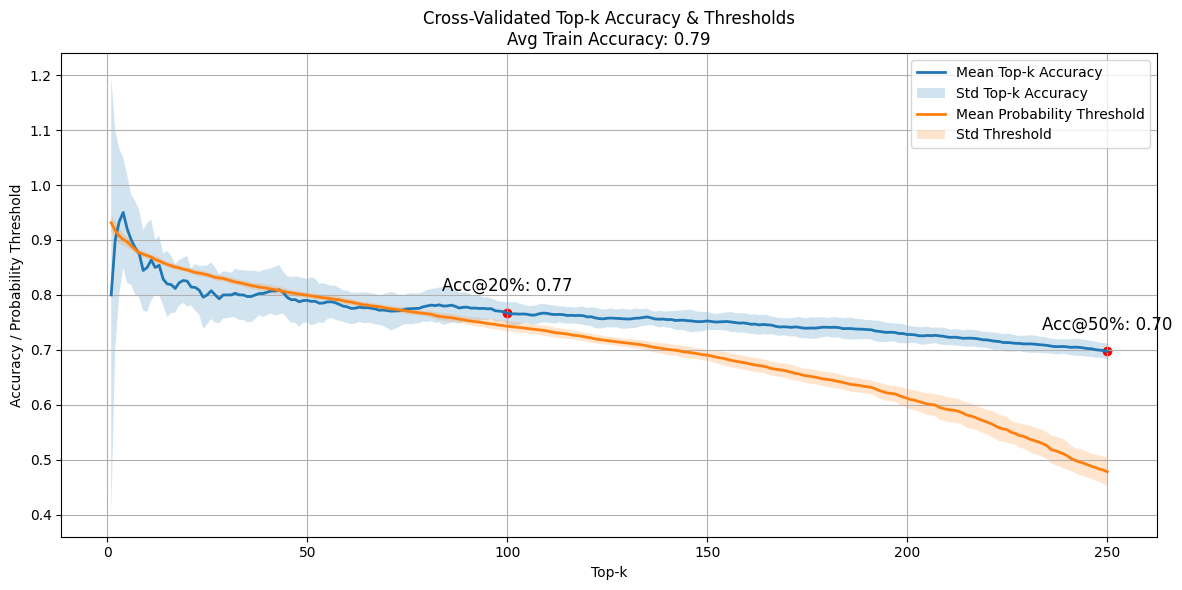

Test Accuracies (Overall): 0.71 ± 0.01


0.7653465346534652

In [21]:
ensemble = ModelEnsemble(models=[
    GradientBoostingClassifier(n_estimators=200, random_state=42),
    ],
    voting='mean')
comparator.evaluate_model(ensemble, variables=paifs_variables)

#### Deleting variables 3 and 4 due to correlation

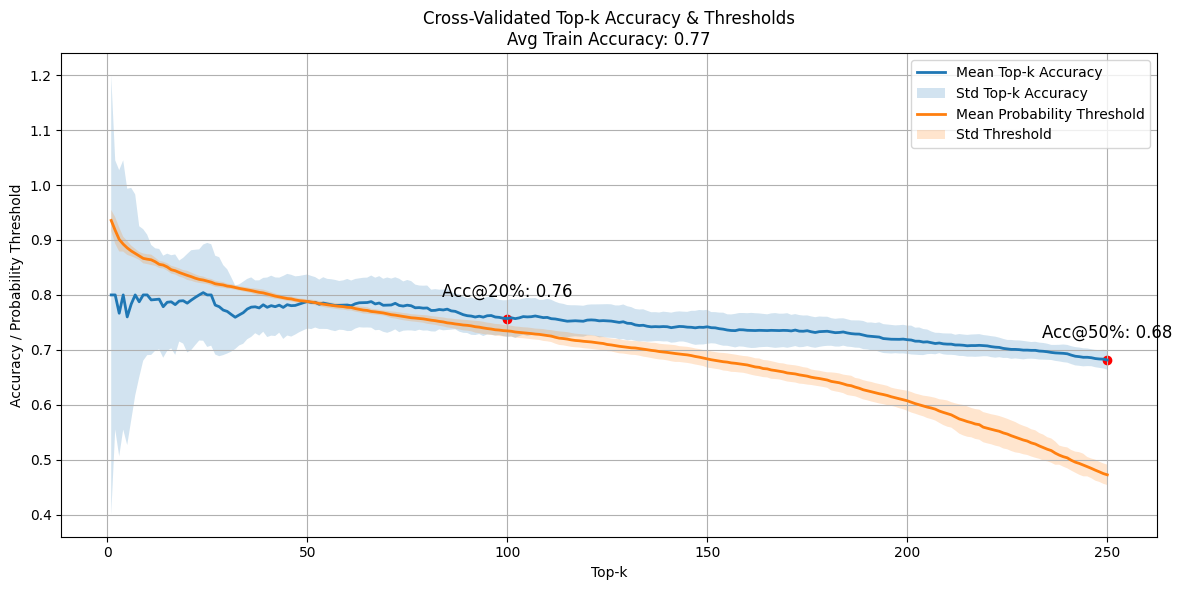

Test Accuracies (Overall): 0.69 ± 0.02


0.7584158415841583

In [ ]:
ensemble = ModelEnsemble(models=[
    GradientBoostingClassifier(n_estimators=200, random_state=42),
    ],
    voting='mean')
comparator.evaluate_model(ensemble, variables=[2, 323, 360, 395, 397, 374, 315, 191])

#### Further deletion of 323 (it reduced the performance in the tests above)

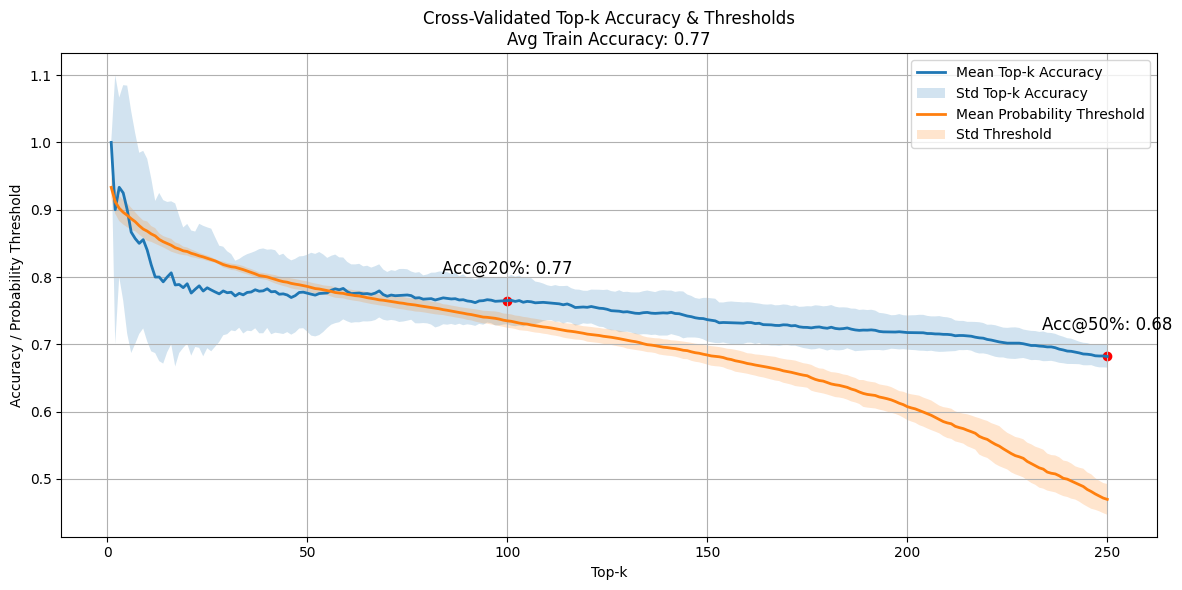

Test Accuracies (Overall): 0.69 ± 0.02


0.7653465346534652

In [27]:
ensemble = ModelEnsemble(models=[
    GradientBoostingClassifier(n_estimators=200, random_state=42),
    ],
    voting='mean')
comparator.evaluate_model(ensemble, variables=[2, 360, 395, 397, 374, 315, 191])

#### Feature importance based on Gradient Boosting Classifier

In [33]:
model = GradientBoostingClassifier(n_estimators=200, random_state=42)

In [36]:
scaler = tree_column_transformer
X_scaled = scaler.fit_transform(np.asarray(X))

In [43]:
model.fit(X_scaled[:, [360, 395, 397, 2, 374, 315, 191]], y)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [44]:
model.feature_importances_

array([0.08000062, 0.06354235, 0.06546435, 0.59617434, 0.06973774,
       0.05841646, 0.06666414])

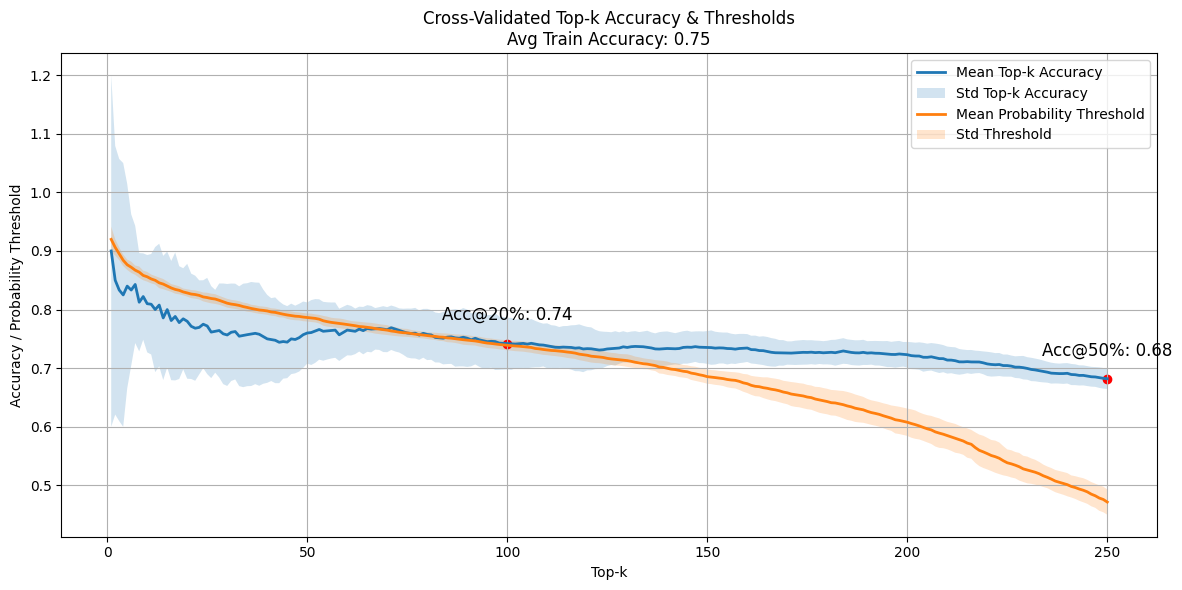

Test Accuracies (Overall): 0.69 ± 0.02


0.7415841584158415

In [48]:
ensemble = ModelEnsemble(models=[
    GradientBoostingClassifier(n_estimators=200, random_state=42),
    ],
    voting='mean')
comparator.evaluate_model(ensemble, variables=[360, 2, 374])

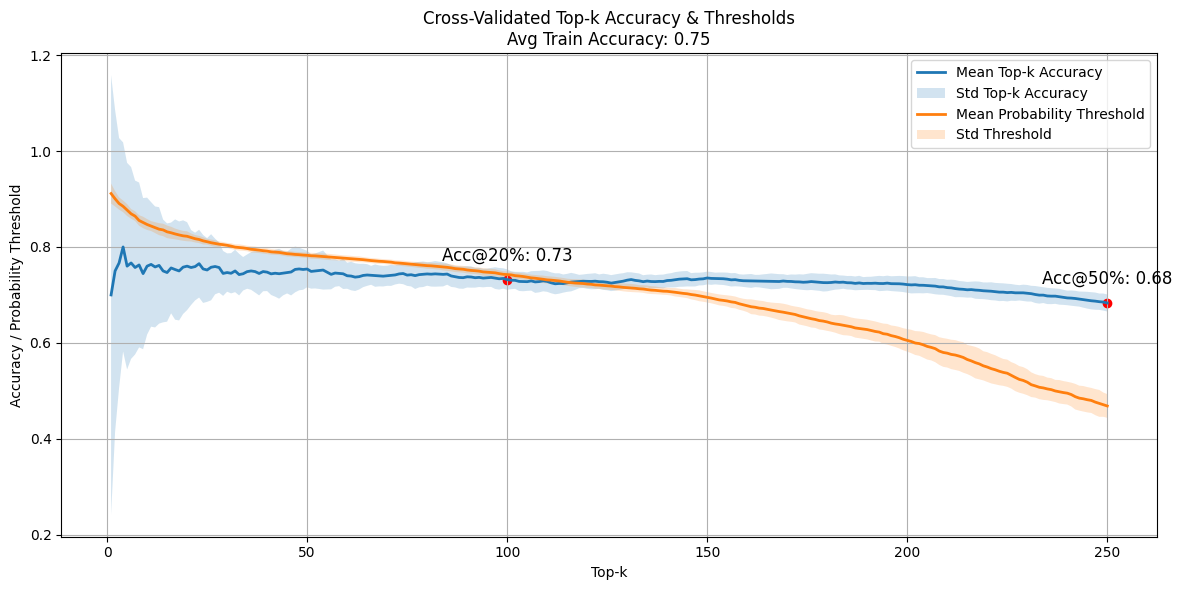

Test Accuracies (Overall): 0.70 ± 0.02


0.7306930693069306

In [49]:
ensemble = ModelEnsemble(models=[
    GradientBoostingClassifier(n_estimators=200, random_state=42),
    ],
    voting='mean')
comparator.evaluate_model(ensemble, variables=[2, 374])

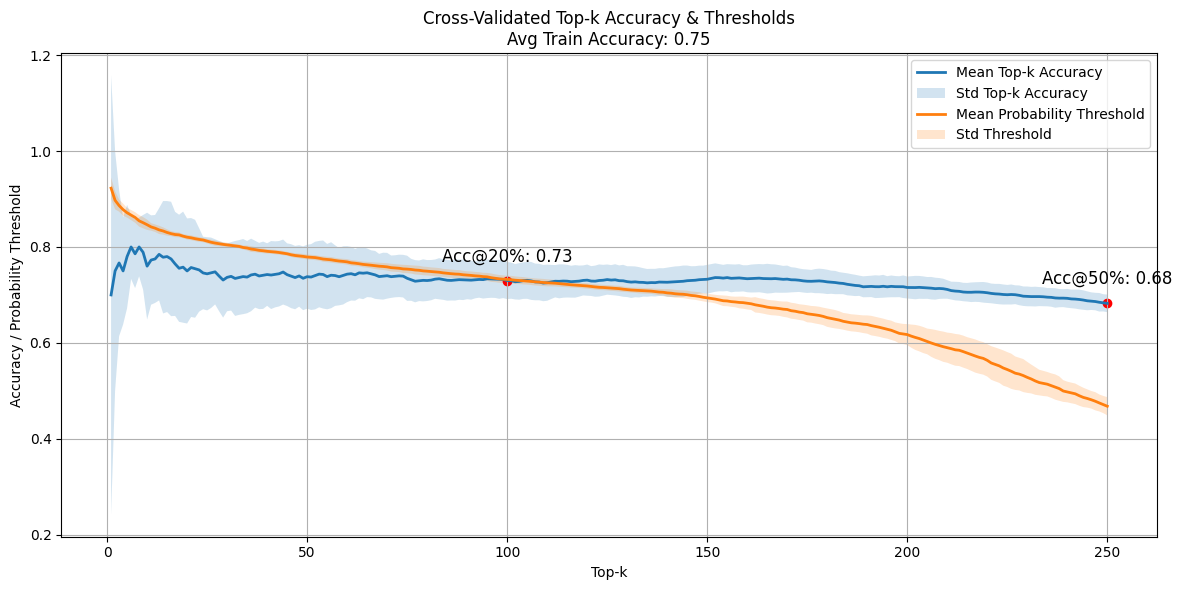

Test Accuracies (Overall): 0.70 ± 0.02


0.7297029702970296

In [50]:
ensemble = ModelEnsemble(models=[
    GradientBoostingClassifier(n_estimators=200, random_state=42),
    ],
    voting='mean')
comparator.evaluate_model(ensemble, variables=[2, 360])

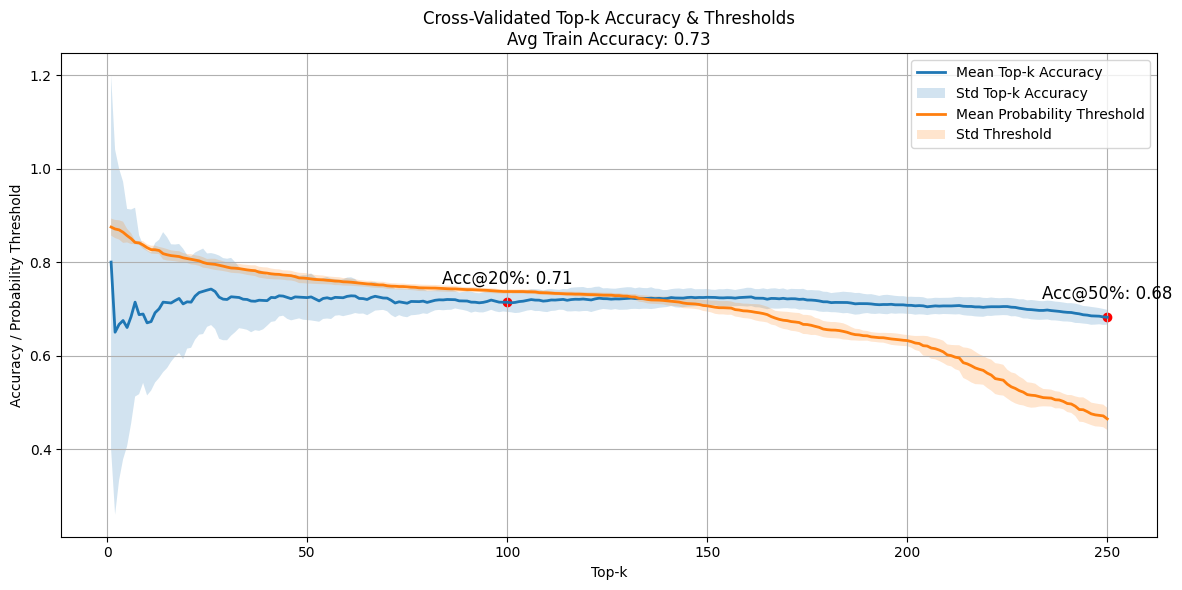

Test Accuracies (Overall): 0.69 ± 0.02


0.7128712871287127

In [51]:
ensemble = ModelEnsemble(models=[
    GradientBoostingClassifier(n_estimators=200, random_state=42),
    ],
    voting='mean')
comparator.evaluate_model(ensemble, variables=[2])

# Result calculation

In [ ]:
X_test = pd.read_table('x_test.txt', sep=" ", header=None)

In [83]:
scaler = tree_column_transformer
scaler.fit(np.asarray(X))
X_train_scaled =  scaler.transform(X)[:, best_paifs_variables]
X_test_scaled = scaler.transform(X_test)[:, best_paifs_variables]

model = GradientBoostingClassifier(n_estimators=100, random_state=42)

model.fit(X_train_scaled, y)
y_pred = model.predict_proba(X_test_scaled)[:,1]

In [94]:
sorted_indices = np.argsort(y_pred)

In [97]:
sorted_indices

array([2118, 4532,  713, ..., 1216, 4287, 2518])

In [98]:
np.savetxt('PAIFS_results.txt', sorted_indices, fmt='%d')